<a href="https://colab.research.google.com/github/lakshmansamvith/Wheeler-Classifier/blob/master/WheelerClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Importing Zipfile

In [0]:
from pyunpack import Archive
Archive('/content/drive/My Drive/Wheeler Classifier.rar').extractall('/content/drive/My Drive')


# Setting up Training and Validation Directories

In [0]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.keras.models import Sequential 

training_dir = '/content/drive/My Drive/Wheeler Classifier/Training'
validation_dir = '/content/drive/My Drive/Wheeler Classifier/Validation'

# Displaying Images

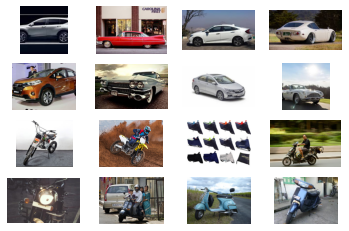

In [39]:
%matplotlib inline
import os 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fourw_tp = os.path.join(training_dir, 'Four Wheeler')
fourw_images = (os.listdir(fourw_tp)[:8])
twow_tp = os.path.join(training_dir, 'Two Wheeler')
twow_images = os.listdir(twow_tp)[:8]


four_wheeler_pic = [os.path.join(fourw_tp, fname) for fname in fourw_images ]
two_wheeler_pic = [os.path.join(twow_tp, fname) for fname in twow_images ]

for num, path in enumerate(four_wheeler_pic + two_wheeler_pic):
  # Set up subplot; subplot indices start at 1
  subplot = plt.subplot(4, 4, num + 1)
  subplot.axis('Off')
  img = mpimg.imread(path)
  plt.imshow(img)

# Initializing Width, Height of Image and Batch Size

In [0]:
width = 224
height = 224
batch_size = 8

# Setting up Training and Validation Generators

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale=1/255.0, 
                                      rotation_range=20, 
                                      width_shift_range=0.5,
                                      height_shift_range=0.5, 
                                      shear_range=0.2,
                                      # vertical_flip=True,
                                      horizontal_flip=True)

training_generator = training_datagen.flow_from_directory(training_dir, 
                                                          target_size=(width,height), 
                                                          batch_size=batch_size,
                                                          color_mode="rgb",
                                                          shuffle=True,
                                                          class_mode='binary')

validation_datagen =  ImageDataGenerator(rescale=1/255.0,)

validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                          target_size=(width,height), 
                                                          class_mode='binary',
                                                          batch_size=batch_size,
                                                          color_mode="rgb",
                                                          shuffle=False)

Found 7343 images belonging to 2 classes.
Found 1078 images belonging to 2 classes.


In [11]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
exist_model = InceptionV3(input_shape=(224, 224, 3), include_top=False)

for layer in exist_model.layers[:-2]:
    # print(layer.trainable)
    layer.trainable = False
# exist_model.summary()

87916544/87910968 [==============================] - 1s 0us/step


#Adding Layers to the Existing Model 

In [0]:
model = Sequential()
model.add(exist_model)
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

# For Obtaining Best Weights 

In [0]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10) # stop training if val acc does not improve after "patience" number of epochs
ckpt =  ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True) # save only best weights

# Train Model

In [15]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit_generator(training_generator,
                    epochs=15,
                    steps_per_epoch=training_generator.n//batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n//batch_size,
                    verbose=1,
                    callbacks = [es,ckpt]
                   )


Epoch 1/15
407/917 [============>.................] - ETA: 1:14 - loss: 0.1633 - accuracy: 0.9392

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


917/917 [==============================] - 148s 162ms/step - loss: 0.1520 - accuracy: 0.9401 - val_loss: 0.0148 - val_accuracy: 0.9944
Epoch 2/15
917/917 [==============================] - 145s 158ms/step - loss: 0.1482 - accuracy: 0.9407 - val_loss: 0.0213 - val_accuracy: 0.9935
Epoch 3/15
917/917 [==============================] - 145s 158ms/step - loss: 0.1394 - accuracy: 0.9427 - val_loss: 0.0157 - val_accuracy: 0.9935
Epoch 4/15
917/917 [==============================] - 146s 159ms/step - loss: 0.1509 - accuracy: 0.9414 - val_loss: 0.0147 - val_accuracy: 0.9953
Epoch 5/15
917/917 [==============================] - 146s 159ms/step - loss: 0.1371 - accuracy: 0.9451 - val_loss: 0.0160 - val_accuracy: 0.9916
Epoch 6/15
917/917 [==============================] - 144s 157ms/step - loss: 0.1385 - accuracy: 0.9467 - val_loss: 0.0155 - val_accuracy: 0.9944
Epoch 7/15
917/917 [==============================] - 145s 158ms/step - loss: 0.1502 - accuracy: 0.9434 - val_loss: 0.0144 - val_accura

# Visualizing Loss and Accuracy 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


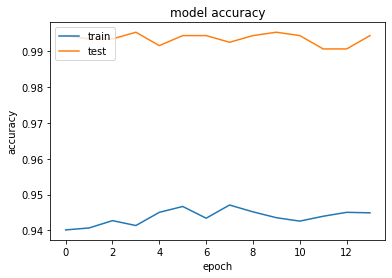

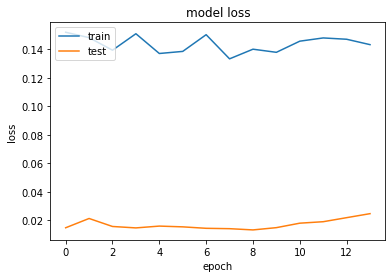

In [16]:
# Run this to visualize training and loss curves

import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()